<a href="https://colab.research.google.com/github/Cooper2112/SQC/blob/main/FinalRaceCarLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Race Car Lab

In [ ]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data2 = pd.read_csv('drive/My Drive/Colab Notebooks/dataCAR.csv', sep=',')

data2

,Unnamed: 0,X1,X2,X3,X4,X5,R1
0,0,-1,-1,-1,-1,1,85
1,1,1,-1,-1,-1,1,120
2,2,-1,1,-1,-1,1,87
3,3,1,1,-1,-1,1,180
4,4,-1,-1,1,-1,1,83
5,5,1,-1,1,-1,1,101
6,6,-1,1,1,-1,1,75
7,7,1,1,1,-1,1,105
8,8,-1,-1,-1,1,1,93
9,9,1,-1,-1,1,1,130


In [ ]:
data2.head()

,Unnamed: 0,X1,X2,X3,X4,X5,R1
0,0,-1,-1,-1,-1,1,85
1,1,1,-1,-1,-1,1,120
2,2,-1,1,-1,-1,1,87
3,3,1,1,-1,-1,1,180
4,4,-1,-1,1,-1,1,83


In [ ]:
data=data2
x1x2x3x4x5=data2['X1'] * data2['X2'] *data2['X3'] * data2['X4']*data2['X5']
data2['ABCDE']=x1x2x3x4x5
data2

,Unnamed: 0,X1,X2,X3,X4,X5,R1,ABCDE
0,0,-1,-1,-1,-1,1,85,1
1,1,1,-1,-1,-1,1,120,-1
2,2,-1,1,-1,-1,1,87,-1
3,3,1,1,-1,-1,1,180,1
4,4,-1,-1,1,-1,1,83,-1
5,5,1,-1,1,-1,1,101,1
6,6,-1,1,1,-1,1,75,1
7,7,1,1,1,-1,1,105,-1
8,8,-1,-1,-1,1,1,93,-1
9,9,1,-1,-1,1,1,130,1


In [ ]:
data2=data2.sort_values(['ABCDE'], ascending=0) #sorting in decending order of the design generator
data2=data2[0:8] #pick the first 8 obs for the first block I=ABCD
data2

,Unnamed: 0,X1,X2,X3,X4,X5,R1,ABCDE
0,0,-1,-1,-1,-1,1,85,1
10,10,-1,1,-1,1,1,84,1
29,29,1,-1,1,1,-1,133,1
27,27,1,1,-1,1,-1,133,1
24,24,-1,-1,-1,1,-1,74,1
23,23,1,1,1,-1,-1,106,1
20,20,-1,-1,1,-1,-1,81,1
18,18,-1,1,-1,-1,-1,83,1


In [ ]:
df=data2 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 18
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  8 non-null      int64
 1   X1          8 non-null      int64
 2   X2          8 non-null      int64
 3   X3          8 non-null      int64
 4   X4          8 non-null      int64
 5   X5          8 non-null      int64
 6   R1          8 non-null      int64
 7   ABCDE       8 non-null      int64
dtypes: int64(8)
memory usage: 576.0 bytes


In [ ]:
Xmain=df[['X1', 'X2', 'X3', 'X4', 'X5']]
Xmain

,X1,X2,X3,X4,X5
0,-1,-1,-1,-1,1
10,-1,1,-1,1,1
29,1,-1,1,1,-1
27,1,1,-1,1,-1
24,-1,-1,-1,1,-1
23,1,1,1,-1,-1
20,-1,-1,1,-1,-1
18,-1,1,-1,-1,-1


In [ ]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'X1', 'X2', 'X3', 'X4','X1X2', 'X1X3', 'X1X4', 'X1X5', 'X2X3', 'X2X4', 'X2X5', 'X3X4', 'X3X5', 'X4X5', 'X1X2X3', 'X1X2X4', 'X1X2X5', 'X1X3X5', 'X1X3X4','X2X3X4', 'X2X3X5', 'X3X4X5', 'X1X2X3X4X5', 'X1X2X3X4', 'X2X3X4X5'])
xxpd['X1X2X3X4X5']=x1x2x3x4x5
xxpd

,I,X1,X2,X3,X4,X1X2,X1X3,X1X4,X1X5,X2X3,...,X1X2X4,X1X2X5,X1X3X5,X1X3X4,X2X3X4,X2X3X5,X3X4X5,X1X2X3X4X5,X1X2X3X4,X2X3X4X5
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1,1.0,1.0
1,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1,1.0,-1.0
2,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1,1.0,-1.0
3,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1,-1.0,1.0
4,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,...,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1,1.0,1.0
5,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1,1.0,1.0
6,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1,-1.0,1.0
7,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1,1.0,-1.0


In [ ]:
X=xxpd[['X1','X2','X3','X4', 'X1X4']]
Y=df[['R1']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)
data2['residual1']=eij

[[  3.]
 [  3.]
 [  9.]
 [  0.]
 [-12.]
 [ -9.]
 [  0.]
 [  6.]]


In [ ]:
X=xxpd[['X1','X2','X3','X4', 'X1X4']]
Y=df[['R2']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)
data2['residual1']=eij

[[ -4.5 ]
 [ 16.25]
 [  4.5 ]
 [-16.25]
 [-16.25]
 [  4.5 ]
 [ 16.25]
 [ -4.5 ]]


In [ ]:
X=xxpd[['X1','X2','X3','X4', 'X1X4']]
Y=df[['R3']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)
data2['residual1']=eij

[[ -4.75]
 [ 16.5 ]
 [  4.75]
 [-16.5 ]
 [-16.5 ]
 [  4.75]
 [ 16.5 ]
 [ -4.75]]


## ANOVA's

In [ ]:
model = ols('R1 ~ C(X1) + C(X2) + C(X1):C(X2)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),3278.892857,1.0,30.715624,0.005183
C(X2),12.342857,1.0,0.115624,0.750936
C(X1):C(X2),123.857143,1.0,1.160254,0.342042
Residual,427.000000,4.0,NaN,NaN


In [ ]:
model = ols('R1 ~ C(X1) + C(X3) + C(X1):C(X3)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),3048.512121,1.0,27.619589,0.006274
C(X3),60.245455,1.0,0.545825,0.501033
C(X1):C(X3),61.454545,1.0,0.556780,0.497026
Residual,441.500000,4.0,NaN,NaN


In [ ]:
model = ols('R1 ~ C(X1) + C(X4) + C(X1):C(X4)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),2900.892857,1.0,200.061576,0.000145
C(X4),93.342857,1.0,6.437438,0.064171
C(X1):C(X4),411.857143,1.0,28.403941,0.005967
Residual,58.000000,4.0,NaN,NaN


In [ ]:
model = ols('R1 ~ C(X2) + C(X3) + C(X2):C(X3)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X2),306.859524,1.0,0.402901,0.560086
C(X3),585.142857,1.0,0.768282,0.430235
C(X2):C(X3),198.107143,1.0,0.260111,0.636897
Residual,3046.500000,4.0,NaN,NaN


In [ ]:
model = ols('R1 ~ C(X2) + C(X4) + C(X2):C(X4)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X2),136.125,1.0,0.169441,0.701710
C(X4),595.125,1.0,0.740781,0.437943
C(X2):C(X4),21.125,1.0,0.026295,0.879043
Residual,3213.500,4.0,NaN,NaN


In [ ]:
model = ols('R1 ~ C(X3) + C(X4) + C(X3):C(X4)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X3),761.285714,1.0,1.319100,0.314765
C(X4),942.002381,1.0,1.632233,0.270506
C(X3):C(X4),300.964286,1.0,0.521489,0.510168
Residual,2308.500000,4.0,NaN,NaN


In [ ]:
model = ols('R2 ~ C(X1) + C(X3) + C(X1):C(X3)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),10.125,1.0,0.025953,0.879824
C(X3),496.125,1.0,1.271708,0.322510
C(X1):C(X3),1.125,1.0,0.002884,0.959749
Residual,1560.500,4.0,NaN,NaN


In [ ]:
model = ols('R2 ~ C(X1) + C(X4) + C(X1):C(X4)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),10.125,1.0,0.049481,0.834866
C(X4),378.125,1.0,1.847892,0.245616
C(X1):C(X4),861.125,1.0,4.208308,0.109514
Residual,818.500,4.0,NaN,NaN


In [ ]:
model = ols('R2 ~ C(X2) + C(X3) + C(X2):C(X3)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X2),45.125,1.0,0.271225,0.630011
C(X3),496.125,1.0,2.981968,0.159271
C(X2):C(X3),861.125,1.0,5.175808,0.085252
Residual,665.500,4.0,NaN,NaN


In [ ]:
model = ols('R2 ~ C(X2) + C(X4) + C(X2):C(X4)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X2),45.125,1.0,0.109827,0.756977
C(X4),378.125,1.0,0.920292,0.391724
C(X2):C(X4),1.125,1.0,0.002738,0.960778
Residual,1643.500,4.0,NaN,NaN


In [ ]:
model = ols('R2 ~ C(X3) + C(X4) + C(X3):C(X4)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X3),496.125,1.0,2.162943,0.215330
C(X4),378.125,1.0,1.648501,0.268489
C(X3):C(X4),276.125,1.0,1.203815,0.334176
Residual,917.500,4.0,NaN,NaN


In [ ]:
model = ols('R3 ~ C(X1) + C(X2) + C(X1):C(X2)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),15.125,1.0,0.031194,0.868391
C(X2),66.125,1.0,0.136375,0.730630
C(X1):C(X2),276.125,1.0,0.569477,0.492461
Residual,1939.500,4.0,NaN,NaN


In [ ]:
model = ols('R3 ~ C(X1) + C(X3) + C(X1):C(X3)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),15.125,1.0,0.036633,0.857536
C(X3),630.125,1.0,1.526188,0.284284
C(X1):C(X3),0.125,1.0,0.000303,0.986951
Residual,1651.500,4.0,NaN,NaN


In [ ]:
model = ols('R3 ~ C(X1) + C(X4) + C(X1):C(X4)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),15.125,1.0,0.062211,0.815320
C(X4),406.125,1.0,1.670437,0.265807
C(X1):C(X4),903.125,1.0,3.714653,0.126200
Residual,972.500,4.0,NaN,NaN


In [ ]:
model = ols('R3 ~ C(X2) + C(X3) + C(X2):C(X3)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X2),66.125,1.0,0.379211,0.571339
C(X3),630.125,1.0,3.613620,0.130096
C(X2):C(X3),903.125,1.0,5.179211,0.085182
Residual,697.500,4.0,NaN,NaN


In [ ]:
model = ols('R3 ~ C(X2) + C(X4) + C(X2):C(X4)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X2),66.125,1.0,0.144971,0.722746
C(X4),406.125,1.0,0.890381,0.398803
C(X2):C(X4),0.125,1.0,0.000274,0.987585
Residual,1824.500,4.0,NaN,NaN


In [ ]:
model = ols('R3 ~ C(X3) + C(X4) + C(X3):C(X4)', data=data2).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X3),630.125,1.0,2.560183,0.184837
C(X4),406.125,1.0,1.650076,0.268295
C(X3):C(X4),276.125,1.0,1.121889,0.349234
Residual,984.500,4.0,NaN,NaN


In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.9573
Date:                Thu, 27 Oct 2022   Prob (F-statistic):              0.494
Time:                        03:11:28   Log-Likelihood:                -34.011
No. Observations:                   8   AIC:                             76.02
Df Residuals:                       4   BIC:                             76.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                84.00

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [ ]:
import statsmodels.api as sm
y = data2['R1']
x = data2[['X1', 'X2','X3', 'X4', 'X5']]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     3.475
Date:                Thu, 27 Oct 2022   Prob (F-statistic):              0.238
Time:                        03:11:37   Log-Likelihood:                -27.092
No. Observations:                   8   AIC:                             66.18
Df Residuals:                       2   BIC:                             66.66
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.3333      6.849     15.088      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [ ]:
import statsmodels.api as sm
y = data2['R2']
x = data2[['X1', 'X2','X3', 'X4', 'X5']]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     R2   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                 -0.285
Method:                 Least Squares   F-statistic:                    0.6124
Date:                Thu, 27 Oct 2022   Prob (F-statistic):              0.684
Time:                        00:12:22   Log-Likelihood:                -31.183
No. Observations:                   8   AIC:                             72.37
Df Residuals:                       3   BIC:                             72.76
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -1.1250      6.887     -0.163      0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [ ]:
import statsmodels.api as sm
y = data2['R3']
x = data2[['X1', 'X2','X3', 'X4', 'X5']]
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     R3   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                 -0.198
Method:                 Least Squares   F-statistic:                    0.7107
Date:                Thu, 27 Oct 2022   Prob (F-statistic):              0.636
Time:                        00:12:22   Log-Likelihood:                -31.325
No. Observations:                   8   AIC:                             72.65
Df Residuals:                       3   BIC:                             73.05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -1.3750      7.010     -0.196      0.8

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


## Linear Regression/Predict

In [ ]:
Y = data2[['R1']]
regr = LinearRegression()
regr.fit(X,Y)
Yhat = regr.predict(X)
Yhat

array([[ 82.],
       [ 81.],
       [124.],
       [133.],
       [ 86.],
       [115.],
       [ 81.],
       [ 77.]])

In [ ]:
Y = data2[['R2']]
regr = LinearRegression()
regr.fit(X,Y)
Yhat = regr.predict(X)
Yhat

array([[66.5 ],
       [69.75],
       [48.5 ],
       [56.25],
       [51.25],
       [57.5 ],
       [37.75],
       [39.5 ]])

In [ ]:
Y = data2[['R3']]
regr = LinearRegression()
regr.fit(X,Y)
Yhat = regr.predict(X)
Yhat

array([[67.75],
       [70.5 ],
       [47.25],
       [55.5 ],
       [50.5 ],
       [59.25],
       [35.5 ],
       [38.75]])

## 3D Plots

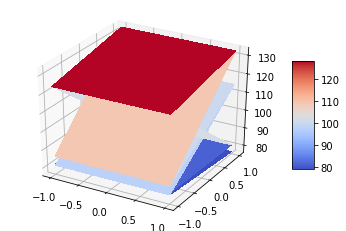

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1 = data2['X1']
x2 = data2['X2']
x1, x2 = np.meshgrid(x1,x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.show()

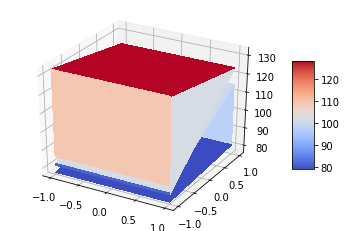

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1 = data2['X1']
x2 = data2['X3']
x1, x2 = np.meshgrid(x1,x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.show()

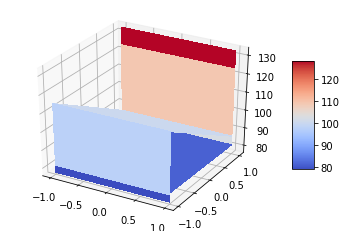

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1 = data2['X1']
x2 = data2['X4']
x1, x2 = np.meshgrid(x1,x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.show()

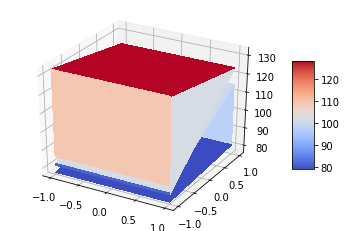

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1 = data2['X2']
x2 = data2['X3']
x1, x2 = np.meshgrid(x1,x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.show()

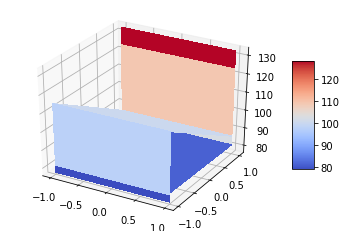

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1 = data2['X2']
x2 = data2['X4']
x1, x2 = np.meshgrid(x1,x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.show()

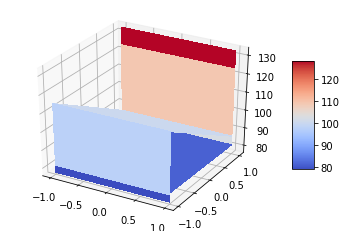

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1 = data2['X3']
x2 = data2['X4']
x1, x2 = np.meshgrid(x1,x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.show()

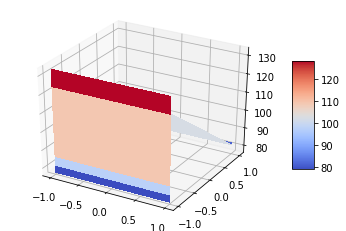

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1 = data2['X1']
x2 = data2['X5']
x1, x2 = np.meshgrid(x1,x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.show()

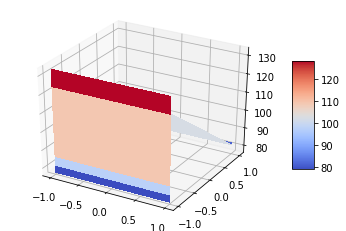

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1 = data2['X2']
x2 = data2['X5']
x1, x2 = np.meshgrid(x1,x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.show()

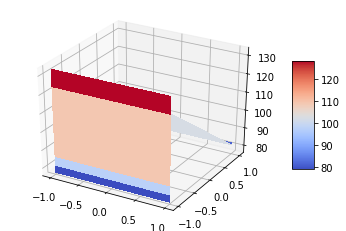

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1 = data2['X3']
x2 = data2['X5']
x1, x2 = np.meshgrid(x1,x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.show()

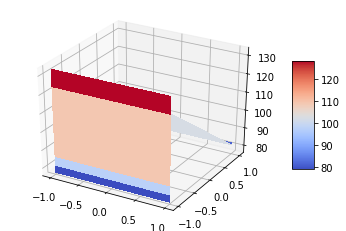

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1 = data2['X4']
x2 = data2['X5']
x1, x2 = np.meshgrid(x1,x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)

z2=data2[['X1','X2']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='AB vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='SmallT',
                    yaxis_title='AddW',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)

z2=data2[['X1','X3']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='AC vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='SmallT',
                    yaxis_title='AddW',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)

z2=data2[['X1','X4']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='AD vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='SmallT',
                    yaxis_title='BigT',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)

z2=data2[['X2','X3']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='BC vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='AddW',
                    yaxis_title='LoseW',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)

z2=data2[['X2','X4']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='BD vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='AddW',
                    yaxis_title='BigT',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)

z2=data2[['X3','X4']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='CD vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='LoseW',
                    yaxis_title='BigT',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)

z2=data2[['X1','X5']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='CD vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='LoseW',
                    yaxis_title='BigT',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)

z2=data2[['X2','X5']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='CD vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='LoseW',
                    yaxis_title='BigT',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)

z2=data2[['X3','X5']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='CD vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='LoseW',
                    yaxis_title='BigT',
                    zaxis_title='Y'),
                   )
fig.show()

In [ ]:
z = data2.values #data values without heading
sh_0, sh_1 = z.shape # dimension of the data matrix or table
x1, x2 = np.linspace(-1, 1, sh_1), np.linspace(-1, 1, sh_1)

z2=data2[['X4','X5']]
fig = go.Figure(data=[go.Surface(z=z2, x=x1, y=x2)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout(title='CD vs. Y', autosize=False,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)
fig.update_layout(scene = dict(
                    xaxis_title='LoseW',
                    yaxis_title='BigT',
                    zaxis_title='Y'),
                   )
fig.show()

## STDEV Anova Tables

In [ ]:
import pandas as pd
data3 = pd.read_csv('drive/My Drive/Colab Notebooks/SQCSTDEV.csv', sep=',')

data3

,X1,X2,X3,X4,X5,STDEV
0,-1,-1,-1,-1,1,1.5270
1,1,-1,-1,-1,1,1.5270
2,-1,1,-1,-1,1,1.5270
3,1,1,-1,-1,1,1.5270
4,-1,-1,1,-1,1,3.5120
5,1,-1,1,-1,1,1.0000
6,-1,1,1,-1,1,1.0000
7,1,1,1,-1,1,3.3600
8,-1,-1,-1,1,1,1.5270
9,1,-1,-1,1,1,2.0822


In [ ]:
model = ols('STDEV ~ C(X1) + C(X2) + C(X1):C(X2)', data=data3).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),0.328100,1.0,0.195216,0.666467
C(X2),0.327985,1.0,0.195148,0.666521
C(X1):C(X2),4.331393,1.0,2.577139,0.134396
Residual,20.168377,12.0,NaN,NaN


In [ ]:
model = ols('STDEV ~ C(X1) + C(X3) + C(X1):C(X3)', data=data3).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),0.328100,1.0,0.180304,0.678626
C(X3),0.033599,1.0,0.018464,0.894167
C(X1):C(X3),2.957712,1.0,1.625381,0.226475
Residual,21.836445,12.0,NaN,NaN


In [ ]:
model = ols('STDEV ~ C(X1) + C(X4) + C(X1):C(X4)', data=data3).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X1),0.328100,1.0,0.171435,0.686144
C(X4),1.440720,1.0,0.752790,0.402612
C(X1):C(X4),0.420941,1.0,0.219946,0.647487
Residual,22.966094,12.0,NaN,NaN


In [ ]:
model = ols('STDEV ~ C(X2) + C(X3) + C(X2):C(X3)', data=data3).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X2),0.327985,1.0,0.177993,0.680563
C(X3),0.033599,1.0,0.018234,0.894825
C(X2):C(X3),2.682061,1.0,1.455519,0.250891
Residual,22.112210,12.0,NaN,NaN


In [ ]:
model = ols('STDEV ~ C(X2) + C(X4) + C(X2):C(X4)', data=data3).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X2),0.327985,1.0,0.171374,0.686197
C(X4),1.440720,1.0,0.752782,0.402614
C(X2):C(X4),0.420812,1.0,0.219876,0.647539
Residual,22.966339,12.0,NaN,NaN


In [ ]:
model = ols('STDEV ~ C(X3) + C(X4) + C(X3):C(X4)', data=data3).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(X3),0.033599,1.0,0.018990,0.892680
C(X4),1.440720,1.0,0.814297,0.384608
C(X3):C(X4),2.450164,1.0,1.384836,0.262095
Residual,21.231373,12.0,NaN,NaN


## Curvature Test

In [ ]:
model = sm.OLS(y, x)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     R3   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                 -0.198
Method:                 Least Squares   F-statistic:                    0.7107
Date:                Thu, 27 Oct 2022   Prob (F-statistic):              0.636
Time:                        00:12:26   Log-Likelihood:                -31.325
No. Observations:                   8   AIC:                             72.65
Df Residuals:                       3   BIC:                             73.05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -1.3750      7.010     -0.196      0.8

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



In [ ]:
xx = x.to_numpy()
poly = PolynomialFeatures(degree=5, interaction_only=True)
xxpd = pd.DataFrame(poly.fit_transform(xx), columns=['I', 'X1', 'X2', 'X3', 'X4', 'X5', 'X1X2', 'X1X3', 'X2X3', 'X1X2X3', 'X1X4', 'X2X4', 'X3X4', 'X1X2X4', 'X1X3X4', 'X2X3X4', 'X1X2X3X4', 'X1X5', 'X2X5', 'X3X5', 'X4X5', 'X1X2X5', 'X1X3X5', 'X1X4X5', 'X2X3X5', 'X2X4X5', 'X3X4X5', 'X1X2X3X5', 'X1X2X4', 'X1X2X4', 'X1X2X4X5', 'X2X3X4X5'])
xxpd

,I,X1,X2,X3,X4,X5,X1X2,X1X3,X2X3,X1X2X3,...,X1X3X5,X1X4X5,X2X3X5,X2X4X5,X3X4X5,X1X2X3X5,X1X2X4,X1X2X4,X1X2X4X5,X2X3X4X5
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,...,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,...,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
2,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
3,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
4,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
5,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0
6,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


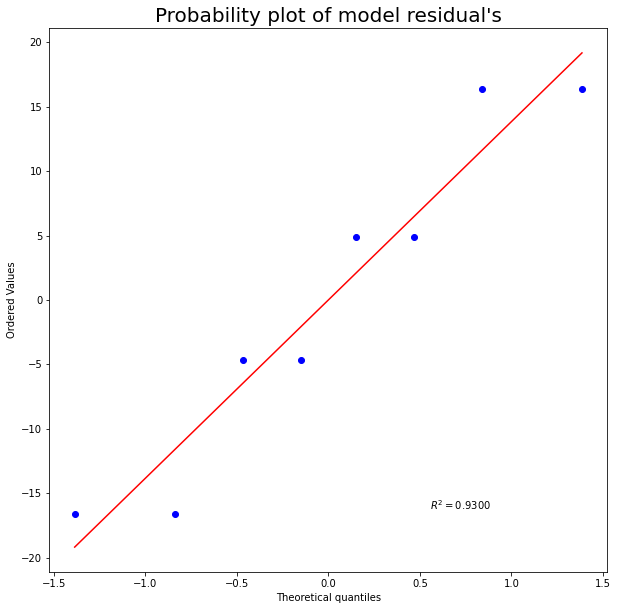

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

## P-Values

In [ ]:
stats.levene(data2['R1'][data2['X1'] == -1],
             data2['R1'][data2['X1'] == 1])

LeveneResult(statistic=1.3000949667616335, pvalue=0.29765725092365)

In [ ]:
stats.levene(data2['R1'][data2['X2'] == -1],
             data2['R1'][data2['X2'] == 1])

LeveneResult(statistic=1.5525982256020279, pvalue=0.25919768466495313)

In [ ]:
stats.levene(data2['R1'][data2['X3'] == -1],
             data2['R1'][data2['X3'] == 1])

LeveneResult(statistic=0.9836233367451381, pvalue=0.3596021919512364)

In [ ]:
stats.levene(data2['R1'][data2['X4'] == -1],
             data2['R1'][data2['X4'] == 1])

LeveneResult(statistic=0.1875968992248062, pvalue=0.6800614109553735)

In [ ]:
stats.levene(data2['R2'][data2['X1'] == -1],
             data2['R2'][data2['X1'] == 1])

LeveneResult(statistic=1.1836575875486381, pvalue=0.31837239932487127)

In [ ]:
stats.levene(data2['R2'][data2['X2'] == -1],
             data2['R2'][data2['X2'] == 1])

LeveneResult(statistic=2.4907749077490773, pvalue=0.16559206949615027)

In [ ]:
stats.levene(data2['R2'][data2['X3'] == -1],
             data2['R2'][data2['X3'] == 1])

LeveneResult(statistic=0.40305173055452176, pvalue=0.5489456958121143)

In [ ]:
stats.levene(data2['R2'][data2['X4'] == -1],
             data2['R2'][data2['X4'] == 1])

LeveneResult(statistic=0.13477537437603992, pvalue=0.7261315425856603)

In [ ]:
stats.levene(data2['R3'][data2['X1'] == -1],
             data2['R3'][data2['X1'] == 1])

LeveneResult(statistic=0.883625871603751, pvalue=0.38349569292194097)

In [ ]:
stats.levene(data2['R3'][data2['X2'] == -1],
             data2['R3'][data2['X2'] == 1])

LeveneResult(statistic=3.037958667229017, pvalue=0.13196658752803844)

In [ ]:
stats.levene(data2['R3'][data2['X3'] == -1],
             data2['R3'][data2['X3'] == 1])

LeveneResult(statistic=0.5566467905997895, pvalue=0.48380975237309853)

In [ ]:
stats.levene(data2['R3'][data2['X4'] == -1],
             data2['R3'][data2['X4'] == 1])

LeveneResult(statistic=0.1776798825256975, pvalue=0.6880587931149189)

## Beta/Box Plots

In [ ]:
beta=regr.coef_
betas=beta.flatten()
betas

array([-1.375,  2.875, -8.875, -7.125,  0.125])

In [ ]:
from statistics import variance
Ycenter=[data2['R1'][data2['X1']==0]]
#Ydata0=np.array(Ycenter)
#Yrow=Ydata0[0]
Yrow=np.array(Ycenter)[0]
#MSpe=statistics.variance(Yrow) somehow the output is integer
MSpe=np.var(Yrow, ddof=1) # ddof = 0 gives biased estimator
MSpe

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



nan

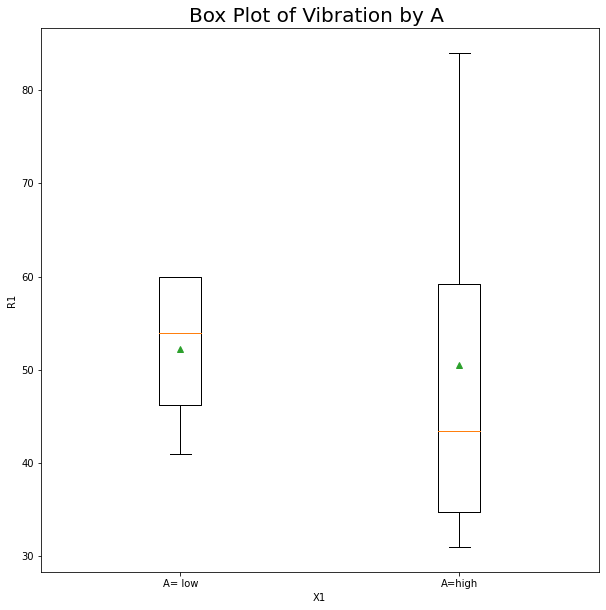

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of  ", fontsize= 20)
ax.set

data2 = [df['R1'][df['X1'] == -1],
             df['R1'][df['X1'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("X1")
plt.ylabel("R1")

plt.show()

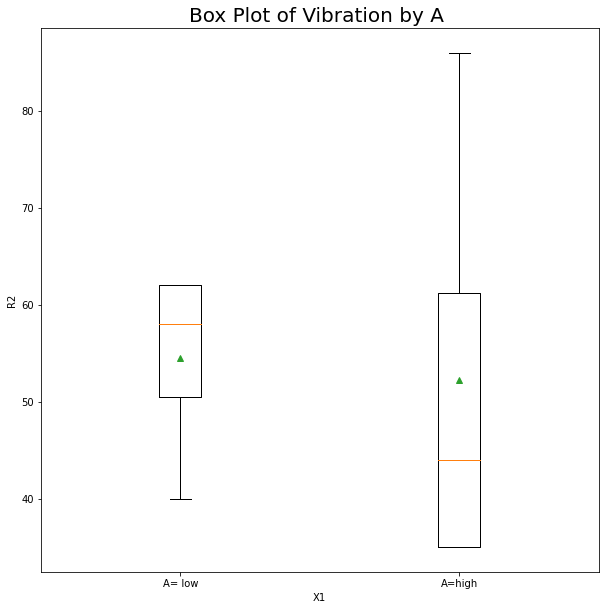

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A ", fontsize= 20)
ax.set

data2 = [df['R2'][df['X1'] == -1],
             df['R2'][df['X1'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("X1")
plt.ylabel("R2")

plt.show()

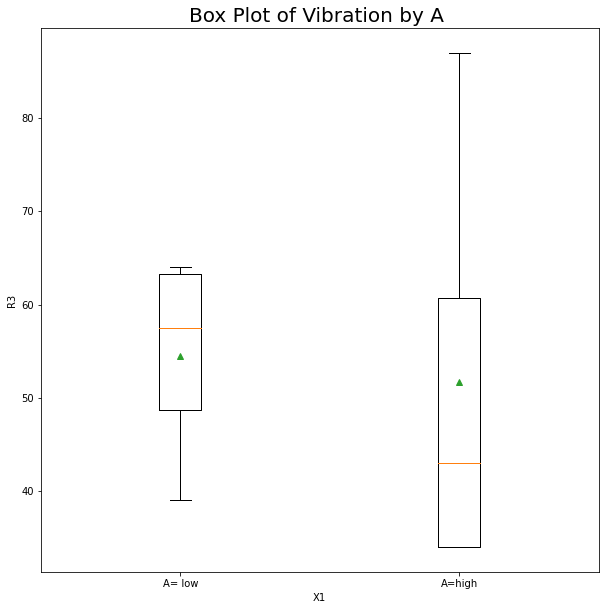

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A ", fontsize= 20)
ax.set

data2 = [df['R3'][df['X1'] == -1],
             df['R3'][df['X1'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("X1")
plt.ylabel("R3")

plt.show()

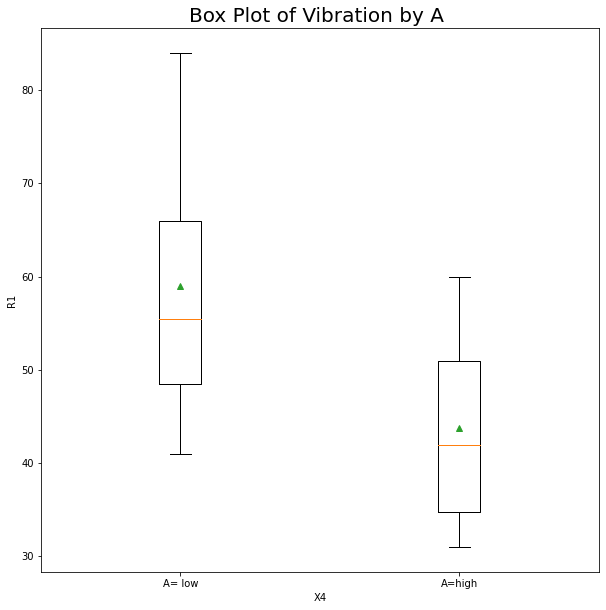

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A ", fontsize= 20)
ax.set

data2 = [df['R1'][df['X4'] == -1],
             df['R1'][df['X4'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("X4")
plt.ylabel("R1")

plt.show()

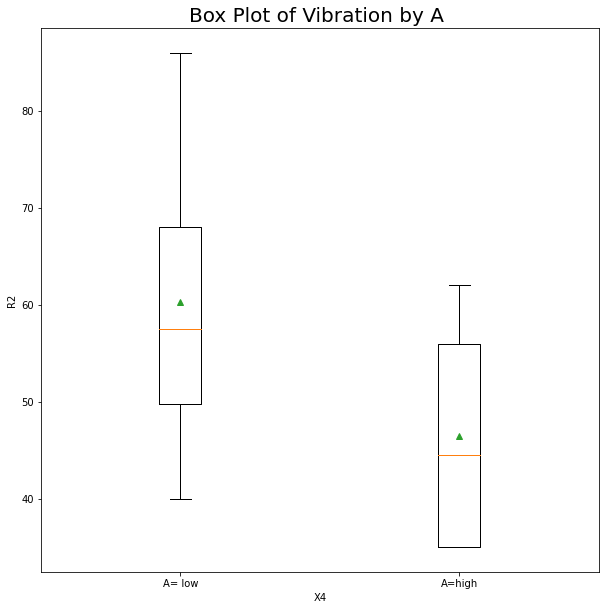

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A ", fontsize= 20)
ax.set

data2 = [df['R2'][df['X4'] == -1],
             df['R2'][df['X4'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("X4")
plt.ylabel("R2")

plt.show()

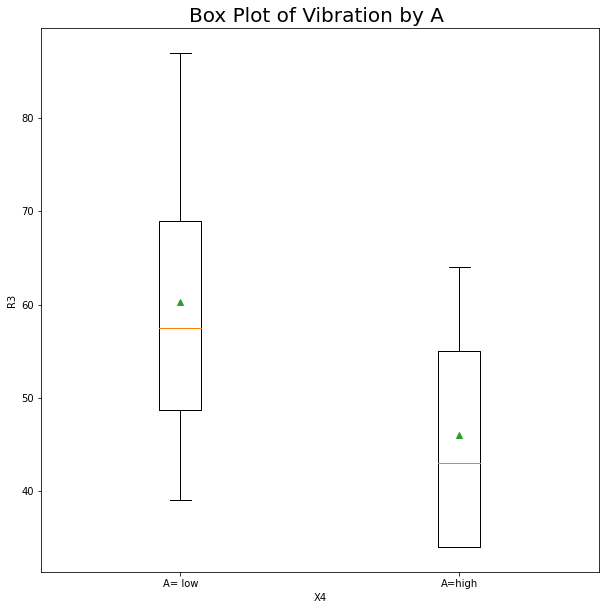

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A ", fontsize= 20)
ax.set

data2 = [df['R3'][df['X4'] == -1],
             df['R3'][df['X4'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("X4")
plt.ylabel("R3")

plt.show()